## Dimensionality Reduction with Scikit-Learn 

### PCA on MNIST

Code adapted from https://github.com/ageron/handson-ml

#### Load MNIST

In [1]:
import numpy as np
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

/home/lukasb23/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
len(x_train), len(y_train)

(60000, 60000)

In [5]:
print(x_train.shape)
x_train[1]

(60000, 28, 28)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Features already min-max scaled. 

In [7]:
#reshaping to 2d array 
nsamples, nx, ny = x_train.shape
X_train = x_train.reshape((nsamples,nx*ny))

However, contrary to ageron, we center the data leading to a different result. 

In [8]:
#StandardScaler to center data 
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_train[:1]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -4.41807799e-03, -5.75481961e-03, -4.08251693e-03,
        -4.08251693e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -4.08251693e-03,
        -4.70968827e-03, -8.79934640e-03, -1.15905591e-02,
        -1.47589798e-02, -1.92848546e-02, -2.46717975e-02,
        -2.90710271e-02, -3.05926583e-02, -3.11640127e-02,
        -3.19628719e-02, -3.02025355e-02, -3.13102175e-02,
        -2.83833960e-02, -2.31191906e-02, -1.91666260e-02,
        -1.67723008e-02, -1.09963601e-02, -8.32486080e-0

#### Option 1: via *cumsum*

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [10]:
d

331

Text(0,0.5,'Cumulated Explained Variance')

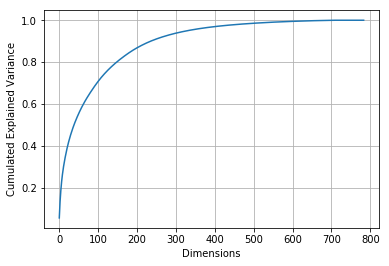

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt 

plt.plot(cumsum)
plt.grid()
plt.xlabel('Dimensions')
plt.ylabel('Cumulated Explained Variance')

#### Option 2: directly via *n_components*

In [12]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [13]:
import pandas as pd 

df = pd.DataFrame(pca.components_)
print(len(df), '--> n_components')
df.head()

331 --> n_components


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-3.850116e-20,-6.938894e-17,-0.000000e+00,-2.220446e-16,-1.110223e-16,2.220446e-16,-0.000000e+00,-0.000000e+00,-0.000000e+00,1.084202e-19,...,-0.000045,0.000891,0.001068,0.001062,0.001080,0.000853,-0.0,-0.0,-0.0,-0.0
1,-2.783334e-19,0.000000e+00,-3.330669e-16,-3.330669e-16,0.000000e+00,-2.220446e-16,5.551115e-17,6.938894e-18,-3.469447e-18,-3.469447e-18,...,0.016067,0.012120,0.008743,0.005689,0.003874,0.002447,0.0,0.0,0.0,0.0
2,4.259445e-21,3.686287e-17,2.602085e-17,-1.908196e-17,-2.602085e-17,-5.811324e-17,5.681219e-17,-4.857226e-17,-5.551115e-17,-2.220446e-16,...,-0.010398,-0.007185,-0.004724,-0.002421,-0.001537,-0.000897,0.0,0.0,0.0,0.0
3,-6.579132e-19,0.000000e+00,-4.440892e-16,3.053113e-16,0.000000e+00,2.775558e-16,0.000000e+00,-2.775558e-17,-1.387779e-17,6.938894e-18,...,0.000127,0.000427,0.001354,0.001786,0.002014,0.001410,0.0,0.0,0.0,0.0
4,-9.214290e-20,-6.938894e-18,-6.938894e-17,1.665335e-16,1.040834e-16,1.110223e-16,3.252607e-17,-5.551115e-17,-1.665335e-16,-1.110223e-16,...,0.004708,0.003555,0.004067,0.004429,0.005053,0.003955,-0.0,-0.0,-0.0,-0.0


In [29]:
#These values tell us 'how much' the feature influences the PC (in our case the PC1).
#https://stackoverflow.com/questions/47370795/pca-on-sklearn-how-to-interpret-pca-components

df.iloc[0][abs(df.iloc[0]) > abs(0.10)]

#features 358,386... are amongst the features that are most influencing 1st PC

358    0.100634
386    0.103184
414    0.102070
442    0.100314
469    0.100046
483    0.100346
Name: 0, dtype: float64

In [33]:
df.iloc[1][abs(df.iloc[1]) > abs(0.1)]
#features 232,259... are amongst the features that are most influencing the 2nd PC

232    0.104997
259    0.105623
260    0.104250
287    0.100149
Name: 1, dtype: float64

In [34]:
df.iloc[2][abs(df.iloc[2]) > abs(0.09)]
#features 124,125... are amongst the features that are most influencing the 3rd PC

124    0.092060
125    0.092375
149    0.092690
150    0.100950
151    0.105373
152    0.106463
153    0.105841
154    0.102600
155    0.095967
263   -0.097934
264   -0.095972
290   -0.094635
Name: 2, dtype: float64

In [35]:
#are there features that have barely any influence on any of the PCs?

#atake bsolute values
features = df.abs().sum() < 0.01
features[features.values]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
52     True
53     True
       ... 
85     True
111    True
112    True
140    True
141    True
168    True
476    True
560    True
644    True
645    True
671    True
672    True
673    True
699    True
700    True
701    True
727    True
728    True
729    True
730    True
754    True
755    True
756    True
757    True
758    True
759    True
780    True
781    True
782    True
783    True
Length: 67, dtype: bool

Text(0,0.5,'Cumulated explained Variance')

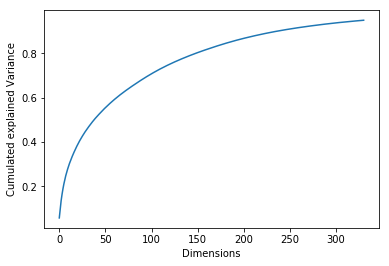

In [36]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('Dimensions')
plt.ylabel('Cumulated explained Variance')

Text(0,0.5,'Explained Variance per Dim')

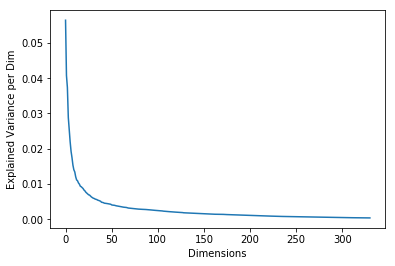

In [37]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance per Dim')

In [38]:
np.sum(pca.explained_variance_ratio_)

0.9502951572319143

In [39]:
len(pca.explained_variance_ratio_)

331

#### Conclusion: 331 dimensions for 95% of variance

In [48]:
pca = PCA(n_components = 331)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [49]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

Text(0.5,1,'Compressed')

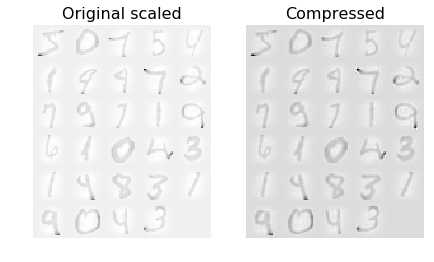

In [50]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original scaled", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

### Randomized PCA

In [51]:
rnd_pca = PCA(n_components=60, svd_solver="randomized", random_state=42)

In [52]:
X_reduced = rnd_pca.fit_transform(X_train)
X_recovered = rnd_pca.inverse_transform(X_reduced)

Text(0.5,1,'Compressed')

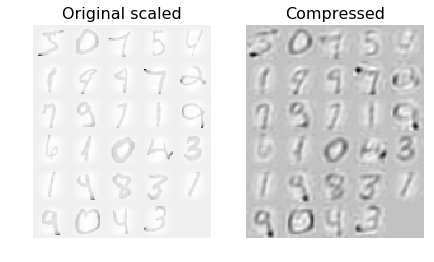

In [53]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original scaled", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

### Kernel PCA with Pipeline

In [5]:
from sklearn.datasets import make_swiss_roll

In [6]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
X

array([[-3.29677117,  4.26198454,  7.69787682],
       [ 5.95972743, 11.45784273, 12.72625276],
       [ 6.66051523, 18.15820401, -9.84713337],
       ...,
       [ 6.18364276,  1.44095323, -1.71242696],
       [ 5.86076169,  1.09185823, 12.47091112],
       [-8.16213703,  5.61235668,  4.51171684]])

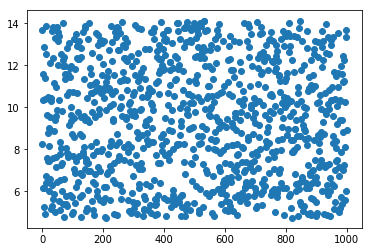

In [16]:
plt.scatter(list(range(1000)), t, marker='o')

In [46]:
y = [] 
for element in t: 
    if element < 7.5: 
        y.append(0)
    elif element < 10: 
        y.append(1)
    elif element < 12.5: 
        y.append(2)
    elif element < 15: 
        y.append(3)
        
y = np.array(y)

array([1, 3, 2, 2, 0, 0, 0, 3, 2, 2, 0, 3, 3, 0, 0, 0, 1, 1, 1, 0, 2, 0,
       0, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 3, 3, 2, 1, 0, 2, 1, 0, 1, 0, 3,
       0, 2, 1, 1, 1, 0, 3, 2, 3, 3, 2, 3, 0, 0, 0, 1, 1, 0, 3, 1, 0, 1,
       0, 2, 0, 3, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 3, 2, 1, 0, 1, 1, 2, 2,
       3, 1, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 3, 0, 1, 2, 0, 0,
       0, 0, 3, 2, 2, 3, 2, 0, 3, 1, 2, 3, 1, 0, 0, 1, 2, 3, 0, 1, 1, 0,
       0, 1, 3, 1, 1, 2, 1, 3, 3, 0, 1, 1, 0, 0, 2, 1, 0, 0, 3, 0, 0, 1,
       3, 0, 2, 2, 0, 2, 1, 2, 2, 1, 0, 3, 1, 0, 0, 2, 2, 0, 1, 0, 2, 0,
       2, 1, 3, 0, 1, 0, 3, 3, 0, 2, 2, 1, 1, 0, 0, 3, 3, 2, 1, 1, 2, 3,
       3, 2, 2, 0, 0, 3, 2, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 3,
       2, 2, 0, 1, 0, 0, 3, 1, 3, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 3, 3,
       3, 1, 0, 3, 1, 3, 3, 3, 0, 1, 3, 1, 0, 1, 3, 2, 2, 0, 2, 3, 0, 1,
       3, 2, 2, 2, 1, 0, 2, 2, 3, 3, 1, 1, 2, 2, 2, 2, 3, 1, 1, 0, 2, 0,
       1, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 2, 0, 0,

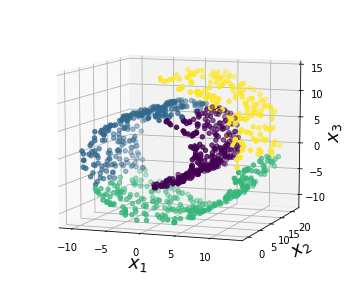

In [72]:
from mpl_toolkits.mplot3d import Axes3D

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

In [50]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=2, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRegre...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'sigmoid'}


In [52]:
rbf_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.03,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)

In [59]:
X_reduced

array([[-0.29720998,  0.83729503],
       [-0.63721411,  0.26483634],
       [ 0.16225282, -0.33333813],
       ...,
       [-0.31482855, -0.64550456],
       [-1.24628789,  0.39081793],
       [ 0.23187847,  0.94112641]])

In [60]:
np.transpose(X_reduced)

array([[-0.29720998, -0.63721411,  0.16225282, ..., -0.31482855,
        -1.24628789,  0.23187847],
       [ 0.83729503,  0.26483634, -0.33333813, ..., -0.64550456,
         0.39081793,  0.94112641]])

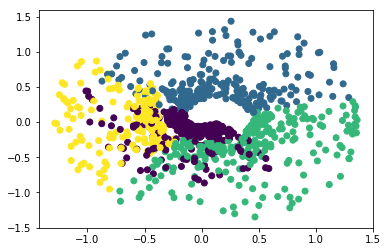

In [70]:
plt.scatter(np.transpose(X_reduced)[0], np.transpose(X_reduced)[1], c=y)

#### Preimage

In [ ]:
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [78]:
X_preimage

array([[-1.60503679, 11.30674399,  7.4265705 ],
       [ 4.35615007, 10.8576795 ,  6.49562402],
       [ 3.14451106, 10.28032456, -3.05987208],
       ...,
       [ 8.28564889, 10.20268895, -1.3779093 ],
       [ 7.51217753, 11.43109533, 11.7522035 ],
       [-5.69345805, 11.40599661,  4.11848747]])

In [73]:
X = X_preimage

<IPython.core.display.Javascript object>


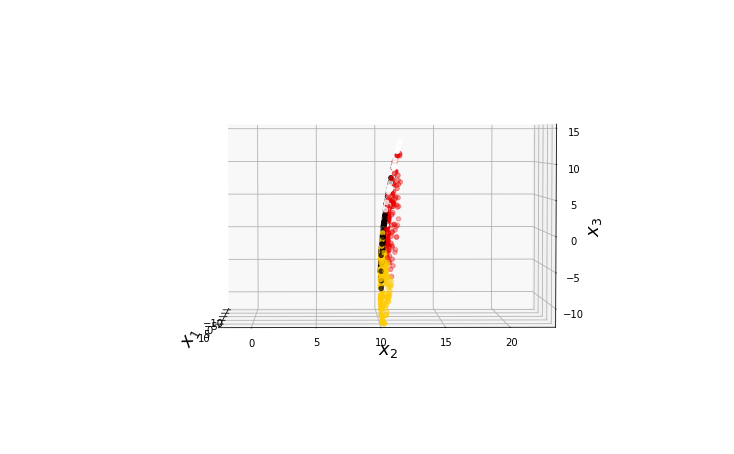

In [77]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()